In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gmplot

In [2]:
from scavenger import *

In [8]:
query = (Images
         .select(Images.street, Locations.dis_lat, Locations.dis_long, fn.Count(Images.id).alias('nr_images'))
         .join(Locations, on=(Images.street == Locations.street))
         .where(Images.street!="" and Images.usable==1)
         .group_by(Images.street)
         .dicts())

In [9]:
df = pd.DataFrame(query, columns=['street', 'dis_lat', 'dis_long', 'nr_images'])

In [14]:
df.head()

,street,dis_lat,dis_long,nr_images
0,Muntelplein,51.69426,5.30766,5
1,Citadellaan,51.69688,5.30403,74
2,Brugplein,51.69439,5.29895,16
3,Uilenburg,51.68760,5.29959,58
4,Hinthamerstraat,51.68902,5.30550,1026


In [16]:
df.sort_values('nr_images', ascending=False)

,street,dis_lat,dis_long,nr_images
19,Markt,51.68885,5.30345,2340
11,Parade,51.68667,5.30781,1291
4,Hinthamerstraat,51.68902,5.30550,1026
15,Vughterstraat,51.68703,5.30093,560
44,Hekellaan,51.68533,5.31156,509
7,Zuid Willemsvaart,51.69098,5.30907,506
86,Schapenmarkt,51.68828,5.30240,455
57,Stationsplein,51.69006,5.29531,411
43,Oude Engelenseweg,51.70143,5.28121,407
139,Verwersstraat,51.68692,5.30520,392


In [11]:
df.shape

(624, 4)

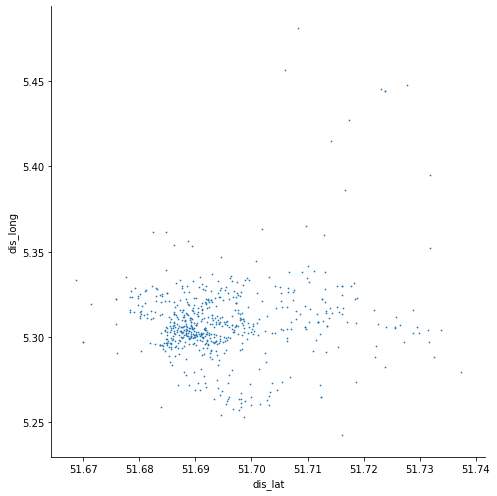

In [12]:
g = sns.FacetGrid(df, height=7)
g = g.map(plt.scatter, "dis_lat", "dis_long", marker=".", s=2)

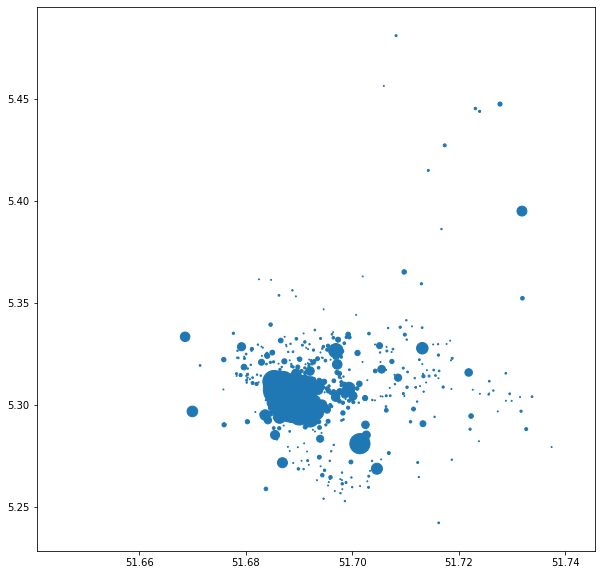

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(df['dis_lat'], df['dis_long'], s=df['nr_images'])
plt.show()

In [97]:
den_bosch = gmplot.GoogleMapPlotter(np.mean(df['dis_lat']), np.mean(df['dis_long']), 13)
den_bosch.scatter(df['dis_lat'], df['dis_long'], '#FF0000', s=20, marker = False)

In [98]:
den_bosch.draw('den_bosch.html')